# **Machine Learning specialization's optional Lab**

## **Univariate Linear Regression**

### **Computing Cost**
The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  
>Note, in lecture summation ranges are typically from 1 to m, while code will be from 0 to m-1.

In [1]:
def compute_cost(x,y,w,b):
    """
    Computes the cost function for linear regression.

    Args:
    x(ndarray (m,)): Data, m examples 
    y(ndarray (m,)): Target values
    w,b (scalar) : model parameters

    returns 
    Total_cost (float): the cost of using w and b as the parameters for linear regression to fit the data points in x and y
    """
    m = x.shape[0]

    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        error = (f_wb - y[i])**2
        cost_sum += cost_sum + error
    
    return (1 / (2 * m)) * cost_sum     

### **Computing Gradient Descent**
Gradient Descent is an algorithm that computes local minimums or global minimum of any function. In the case of **univariate linear regression**, 
Calculus theorems help us update the slope  and the bias:

$$\frac{\partial}{\partial w} J(w,b) = \frac{1}{m} \sum\limits_{i=0}^{m-1} (f_{w,b}(x^{(i)})-y^{(i)})\cdot x^{(i)}$$

$$\frac{\partial}{\partial b} J(w,b) = \frac{1}{m} \sum\limits_{i=0}^{m-1} (f_{w,b}(x^{(i)})-y^{(i)})$$

    

In [4]:
import math
def dj_dw(x,y,w,b):
    m = x.shape[0]
    partial = 0
    for i in range(m):
        f_wb = w * x[i] + b
        temp = (f_wb - y[i]) * x[i]
        partial += temp
    return partial/m

def dj_db (x,y,w,b):
    m = x.shape[0]
    partial = 0
    for i in range(m):
        f_wb = w * x[i] + b
        temp = f_wb - y[i]
        partial += temp
    return partial/m 

#batch gradient descent
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    for i in range(num_iters):
        dw = dj_dw(x,y,w,b)
        db = dj_db(x,y,w,b)
        w = w - alpha * dw
        b = b - alpha * db
    if i < 100000:
        J_history.append(cost_function(x,y,w,b))
        p_history.append([w,b])
    if i%(math.ceil(num_iters/10)) == 0:
        print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
    return w,b,J_history,p_history








In [10]:
import numpy as np
import numpy as np

# Expanded data set
x_train = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])  # features
y_train = np.array([300.0, 500.0, 650.0, 800.0, 900.0, 1050.0, 1200.0, 1300.0, 1450.0, 1600.0])  # target values

# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

(w,b) found by gradient descent: (139.0909,210.0000)


In [6]:
gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost)

(np.float64(199.99285075131766),
 np.float64(100.011567727362),
 [np.float64(1.1625753123249932e-05)],
 [[np.float64(199.99285075131766), np.float64(100.011567727362)]])

In [11]:
J_hist

[np.float64(70703.76009786618)]

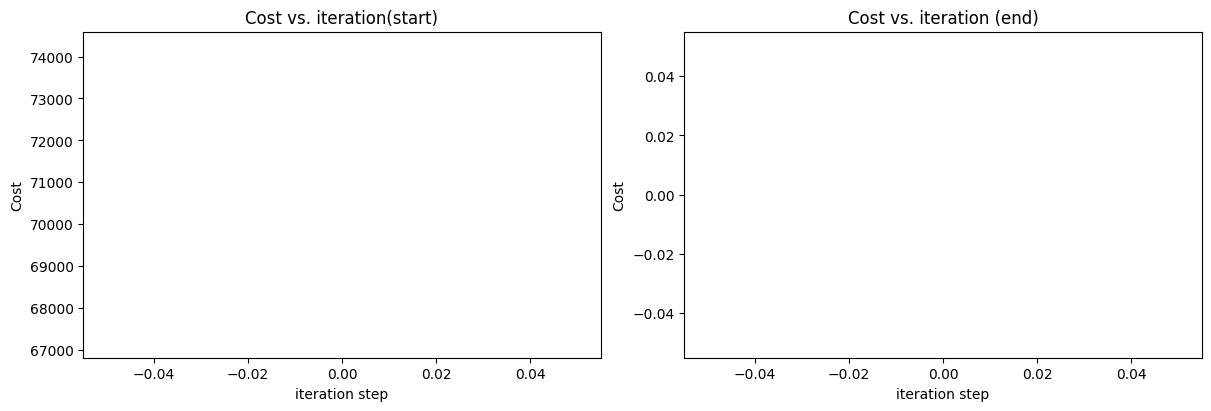

In [12]:
import matplotlib.pyplot as plt
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [13]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")


1000 sqft house prediction 349.1 Thousand dollars
1200 sqft house prediction 376.9 Thousand dollars
2000 sqft house prediction 488.2 Thousand dollars
